<a href="https://colab.research.google.com/github/Awipib/aml_2019_group10/blob/master/gd_rms_camel_fn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing the RMSprop Gradient Descent
The function that we chose to find its minimum, is the Six-Hump Camel.

![alt text](https://www.sfu.ca/~ssurjano/camel62.png)


This function has two global minimum: 

![alt text](https://www.sfu.ca/~ssurjano/camel63.png)

In RMSprop Gradient Descent the learning rate is divided by an exponentially decaying average of squared gradients.

*   g = gradient at x(t)
*   v(t) = beta * v(t-1) + (1-beta) * g^2
*   x(t+1) = x(t) - eta * g / (v(t)^2 + e)^0.5

e  is a smoothing term that avoids division by zero (usually on the order of 1e-8).



In [0]:
import os
import pandas as pd
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from mpl_toolkits import mplot3d

from ipywidgets import interact,interactive, fixed, interact_manual
import ipywidgets as widget
from IPython.display import HTML
from matplotlib import animation, rc


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/My Drive/AML/Projects/GD_v1

/content/gdrive/My Drive/AML/Projects/GD_v1


**Importing the class**

Here we import our class and test the **RMSprop Gradient Descent**. Our starting point is x(1,1), the hyper-parameter eta was set to 0.15 and the beta to 0.8.

The speed is the number of iterations it took to converge and as we can see it took 10 iterations. The minimum that it found is at x(-0.0898, 0.71266), f(x)=-1.0316

In [0]:
import gd

In [0]:
n_iter=1000
starting_pt=[1.,1.]
eta=0.15
tol=1e-5
beta=0.8

gd1=gd.gdcls()
result=gd1.gd_rms_result(n_iter,starting_pt,eta,tol,beta)

In [0]:
result['speed']

10

In [0]:
result['x_op']

[-0.08983813231617678, 0.7126551778098512]

In [0]:
result['min_value']

-1.031628453423624

# Plot x path
We plotted the trajectories of x1 and x2. In the first 2 graphs we used the full path and in the second 2 graphs we started plotting after the first step to have a more detailed inspection.

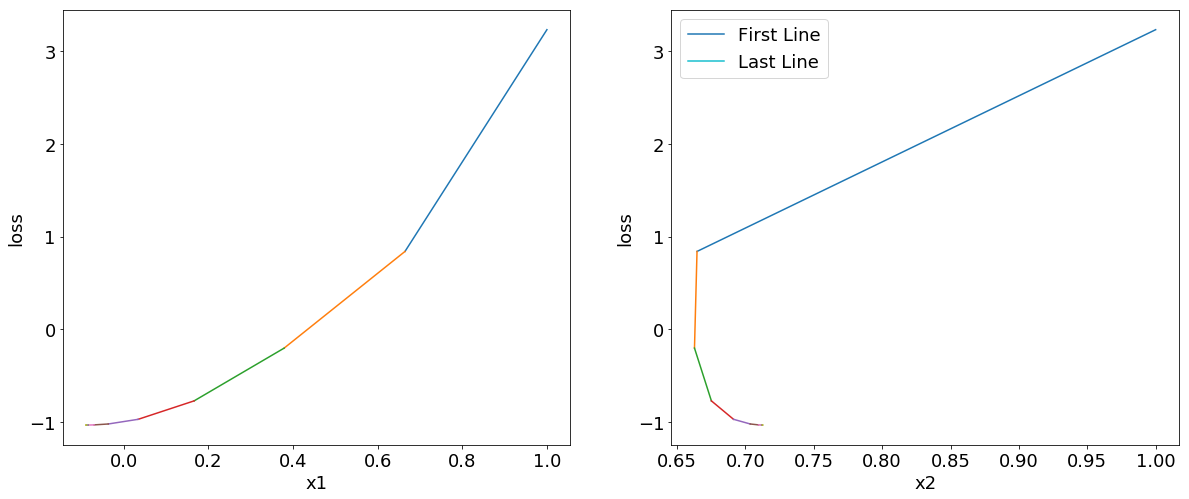

In [0]:
gd1.plot2Dpath(0)

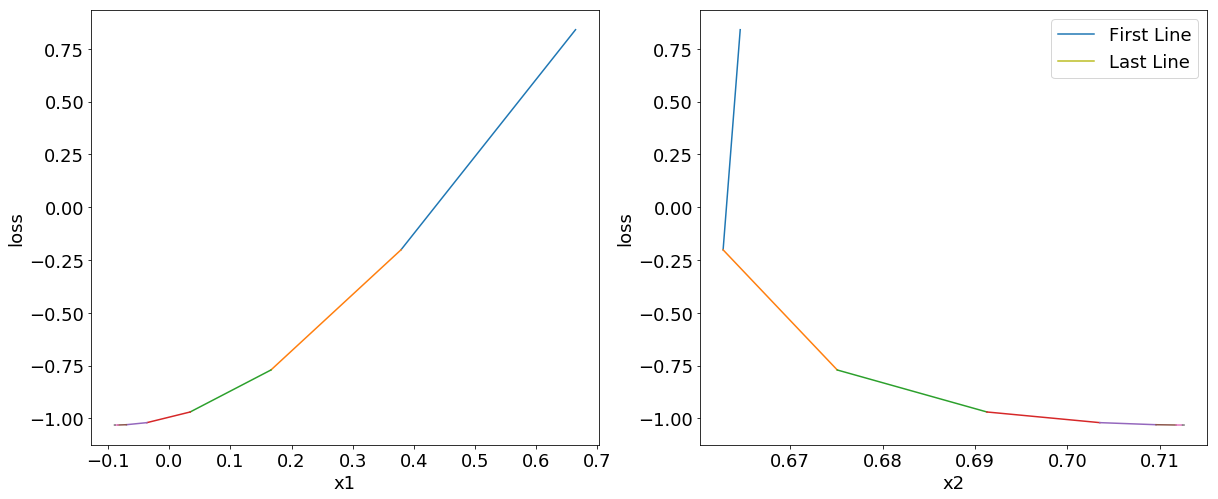

In [0]:
gd1.plot2Dpath(1)

#  3D path
Here, we created animated 3D graphs that show the path of the **RMSprop Gradient Descent**.

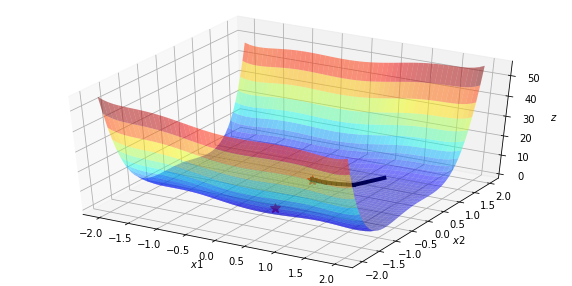

In [0]:
#x1 = np.linspace(-0.2, 0.1, 50)
#x2 = np.linspace(0.6, 0.9 ,50)

x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-2, 2 ,50)

#x1 = np.linspace(-2, 1, 20)
#x2 = np.linspace(0.7,0.75 ,20)

x1, x2 = np.meshgrid(x1, x2)

t1=(4-2.1*x1**2+x1**4/3)*x1**2
t2=x1*x2
t3=(-4+4*x2**2)*x2**2
z = t1+t2+t3



fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d', elev=60, azim=-50)
ax.plot_surface(x1,x2, z, cmap=plt.cm.jet, rstride=1, cstride=1,alpha=0.5, linewidth=0)
#ax.plot_wireframe(x1,x2, z, color='grey')
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$z$')

x1p=result['x1_path']
x2p=result['x2_path']
zp=result['min_value_path']
ax.plot([0.0898],[-0.7126],[-1.0316], 'r*', markersize=10)
ax.plot([-0.0898],[0.7126],[-1.0316],'r*', markersize=10)
n=len(zp)
for i in np.arange(0,n-1):
    ax.plot([x1p[i], x1p[i+1]], [x2p[i],x2p[i+1]],[zp[i],zp[i+1]],'black',linewidth=4)
ax.view_init(40, -60) #first set
#ax.view_init(30, 190) #2nd set

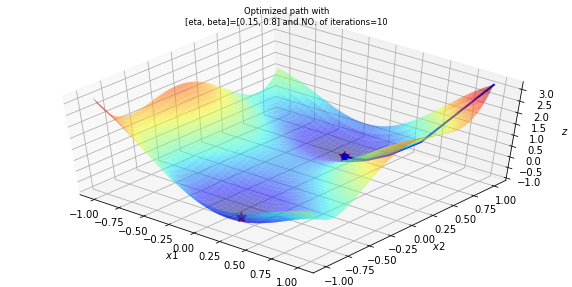

In [0]:
gd1.gd_anim('rms')

In [0]:
n_iter=100
starting_pt=[1.,1.]
tol=1e-5

speed=[]
min_value=[]
x_op=[]
index_eta_beta=[]
x_path=[]
min_path=[]
range_eta=np.arange(0.1,0.3,0.05)
range_beta=np.arange(0.7,0.95,0.01)


for ii in range_eta:
    for jj in range_beta:
        eta=ii
        beta=jj
      
        result_opt=gd1.gd_rms_result(n_iter,starting_pt,eta,tol,beta)
        speed.append(result_opt['speed'])
        min_value.append(result_opt['min_value'])
        x_op.append(result_opt['x_op'])
        x_path.append(result_opt['x_path'])
        index_eta_beta.append([ii,jj])
        min_path.append(result_opt['min_value_path'])

In [0]:
index_eta_beta[np.argmin(speed)]

[0.15000000000000002, 0.9200000000000002]

In [0]:
min(speed)

6

Animation for different values of beta and eta

In [0]:
def f(eta,beta):
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes(projection='3d', elev=50, azim=-50)
    x1 = np.linspace(-0.1,0.1, 50)
    x2 = np.linspace(-1,1 ,50)
    x1, x2 = np.meshgrid(x1, x2)
    t1=(4-2.1*x1**2+x1**4/3)*x1**2
    t2=x1*x2
    t3=(-4+4*x2**2)*x2**2
    z = t1+t2+t3

    ax.plot_surface(x1,x2, z, cmap=plt.cm.jet, rstride=1, cstride=1,alpha=0.5, linewidth=0)
    ax.plot([0.0898],[-0.7126],[-1.0316], 'r*', markersize=10)
    ax.plot([-0.0898],[0.7126],[-1.0316],'r*', markersize=10)
    
    for idxt,value in enumerate(index_eta_beta):
        if value==[eta,beta]:
            idx=idxt 
    x1p=np.array(x_path[idx])[:,0]
    x2p=np.array(x_path[idx])[:,1]
    zp=np.array(min_path[idx])
    speedp=np.array(speed[idx])
    BEp=np.array(index_eta_beta[idx])
    ledg='[eta,beta]='+str(BEp)+' and NO. of iterations='+str(speedp)
    line, = ax.plot([], [],'b', lw=2,label=ledg)
    point, = ax.plot([], [], 'bo')

    def init():
        line.set_data([], [])
        line.set_3d_properties([])
        point.set_data([], [])
        point.set_3d_properties([])
        return line, point
    def animate(i):
        line.set_data(x1p[:i], x2p[:i])
        line.set_3d_properties(zp[:i])
        point.set_data(x1p[i-1:i], x2p[i-1:i])
        point.set_3d_properties(zp[i-1:i])
        return line, point
    
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.array(x1p).shape[0], interval=200, 
                               repeat_delay=1,repeat=True, blit=True)
    ax.set_xlabel('$x1$')
    ax.set_ylabel('$x2$')
    ax.set_zlabel('$z$')
    ax.set_title('Optimized path with'+'\n'+ledg,fontsize='small')
    HTML(anim.to_html5_video())
    rc('animation', html='html5')
    #ax.quiver(x1p[:-1], x2p[:-1], zp[:-1],x1p[1:]-x1p[:-1], x2p[1:]-x2p[:-1], zp[1:]-zp[:-1],color='k')
    
    return anim
     
interact(f,eta=range_eta,beta=range_beta)        
#interact(f,eta=(min(range_eta),max(range_eta),range_eta[1]-range_eta[0]),
#         beta=(min(range_beta),max(range_beta),range_beta[1]-range_beta[0]))


interactive(children=(Dropdown(description='eta', options=(0.1, 0.15000000000000002, 0.20000000000000004, 0.25…

<function __main__.f>

#Experiment on different values of beta and eta
Finally, we experimented with different values of the beta and eta hyper-parameters in the range of (0.7 - 0.9) and (0.01 - 0.25) in order to find the optimal combination.

As it is demonstrated from the last graph, the dark blue points corresponds to a combination of beta and eta which lead to a fast convergence.

Finally, the optimal combination is beta = 0.898, eta = 0.16 that converge in 6 iterations.

In [0]:
eta=np.linspace(0.01, 0.25, 100)
beta=np.linspace(0.7, 0.9, 100)
sp=[]
min_v=[]
eta_beta=[]
for i in eta:
  for j in beta:
    result=gd1.gd_rms_result(n_iter,starting_pt,i,tol,j)
    sp.append(result['speed'])
    min_v.append(result['min_value'])
    eta_beta.append([i,j])
# column=beta,row=eta
sp_=sp
sp=np.asarray(sp).reshape(len(eta),len(beta))
min_v=np.asarray(min_v).reshape(len(eta),len(beta))

Text(0.5, 1.0, 'NO. of Iterations')

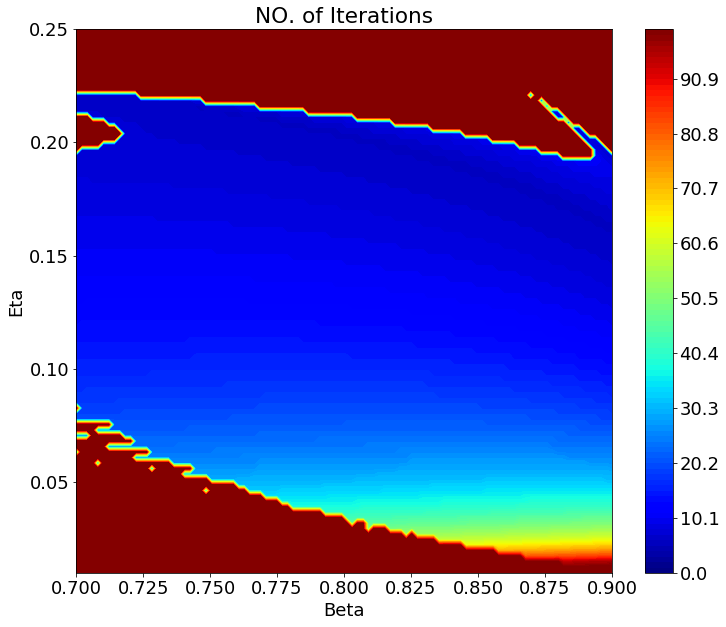

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
c = ax.contourf(beta,eta,sp,np.linspace(0,100,100),cmap=cm.jet)
b = plt.colorbar(c)
ax.set_xlabel('Beta')
ax.set_ylabel('Eta')
plt.title('NO. of Iterations')


In [0]:
eta_beta[np.argmin(sp_)]

[0.1603030303030303, 0.897979797979798]

In [0]:
min(sp_)

6